# LightGBM

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [60]:
df = pd.read_csv("./data/cleansed.csv" ,encoding = "utf-8")
df = df.drop("Unnamed: 0", axis = 1)
#表示列の増加
pd.set_option('display.max_columns', 162)
df.head()

,Median_Age,Mean_Age,Male,White_or_European,African_American,Asian,Hispanic_or_Latino,Multiple_ethnicities_or_other,Fever_temperature_373C,Average_temperature_celsius,Max_temperature_celsius,Smoking_history,Current_drinker,BMI,Any_Comorbidity,Hypertension,Diabetes,Cardiovascular_Disease_incl_CAD,Chronic_obstructive_lung_COPD,Cancer_Any,Liver_Disease_any,Cerebrovascular_Disease,Chronic_kidneyrenal_disease,Other,Respiratory_rate__24_breaths_per_min,Cough,Shortness_of_Breath_dyspnoea,Headache,Sputum_Expectoration,Myalgia_Muscle_Pain,Fatigue,Upper_airway_congestion,Diarrhoea,Nausea_or_Vomiting,Loss_of_AppetiteAnorexia,Sore_ThroatStuffy_Nose,Chills,Chest_Pain,Loss_of_smelltaste,Mortality
0,56.0,0.0,62.30,0.0,0.0,100.0,0.0,0.0,94.00,0.0,0.0,5.76,0.0,0.0,47.60,30.00,19.00,8.00,3.00,1.68,0.0,0.0,1.68,12.00,29.00,79.00,0.0,0.0,23.00,15.00,23.03,0.0,4.71,4.00,0.0,0.0,0.0,0.0,0.0,0.28
1,69.0,0.0,70.37,0.0,0.0,100.0,0.0,0.0,94.44,0.0,0.0,9.26,0.0,0.0,66.67,48.15,31.48,24.07,7.41,0.00,0.0,0.0,3.70,20.37,62.96,72.22,0.0,0.0,25.93,14.81,27.78,0.0,3.70,5.56,0.0,0.0,0.0,0.0,0.0,1.00
2,52.0,0.0,59.12,0.0,0.0,100.0,0.0,0.0,94.16,0.0,0.0,4.38,0.0,0.0,40.15,23.36,13.87,1.46,1.46,7.00,0.0,0.0,0.00,8.03,16.06,81.75,0.0,0.0,21.90,15.33,21.17,0.0,5.11,2.92,0.0,0.0,0.0,0.0,0.0,0.00
3,58.0,0.0,60.30,0.0,0.0,100.0,0.0,0.0,91.50,36.5,0.0,0.00,0.0,0.0,0.00,0.00,11.60,0.00,0.00,3.00,0.0,6.5,0.00,0.00,18.80,0.00,0.0,0.0,0.00,0.00,0.00,0.0,2.06,4.25,1.0,0.0,0.0,0.0,0.0,0.16
4,58.0,0.0,61.60,0.0,0.0,100.0,0.0,0.0,89.90,36.5,0.0,0.00,0.0,0.0,0.00,0.00,10.10,0.00,0.00,5.10,0.0,5.1,0.00,0.00,21.60,0.00,0.0,0.0,0.00,0.00,0.00,0.0,4.20,9.50,2.1,0.0,0.0,0.0,0.0,0.15


In [61]:
#LightGBMライブラリ
import lightgbm as lgb
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=4)

#訓練データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_train = train_set.drop('Mortality', axis=1)
y_train = train_set['Mortality']
 
#モデル評価用データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_test = test_set.drop('Mortality', axis=1)
y_test = test_set['Mortality']

In [62]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

In [63]:
#ハイパーパラメータ
params = {'metric': 'rmse',
          'max_depth' : 9}
df.head()

,Median_Age,Mean_Age,Male,White_or_European,African_American,Asian,Hispanic_or_Latino,Multiple_ethnicities_or_other,Fever_temperature_373C,Average_temperature_celsius,Max_temperature_celsius,Smoking_history,Current_drinker,BMI,Any_Comorbidity,Hypertension,Diabetes,Cardiovascular_Disease_incl_CAD,Chronic_obstructive_lung_COPD,Cancer_Any,Liver_Disease_any,Cerebrovascular_Disease,Chronic_kidneyrenal_disease,Other,Respiratory_rate__24_breaths_per_min,Cough,Shortness_of_Breath_dyspnoea,Headache,Sputum_Expectoration,Myalgia_Muscle_Pain,Fatigue,Upper_airway_congestion,Diarrhoea,Nausea_or_Vomiting,Loss_of_AppetiteAnorexia,Sore_ThroatStuffy_Nose,Chills,Chest_Pain,Loss_of_smelltaste,Mortality
0,56.0,0.0,62.30,0.0,0.0,100.0,0.0,0.0,94.00,0.0,0.0,5.76,0.0,0.0,47.60,30.00,19.00,8.00,3.00,1.68,0.0,0.0,1.68,12.00,29.00,79.00,0.0,0.0,23.00,15.00,23.03,0.0,4.71,4.00,0.0,0.0,0.0,0.0,0.0,0.28
1,69.0,0.0,70.37,0.0,0.0,100.0,0.0,0.0,94.44,0.0,0.0,9.26,0.0,0.0,66.67,48.15,31.48,24.07,7.41,0.00,0.0,0.0,3.70,20.37,62.96,72.22,0.0,0.0,25.93,14.81,27.78,0.0,3.70,5.56,0.0,0.0,0.0,0.0,0.0,1.00
2,52.0,0.0,59.12,0.0,0.0,100.0,0.0,0.0,94.16,0.0,0.0,4.38,0.0,0.0,40.15,23.36,13.87,1.46,1.46,7.00,0.0,0.0,0.00,8.03,16.06,81.75,0.0,0.0,21.90,15.33,21.17,0.0,5.11,2.92,0.0,0.0,0.0,0.0,0.0,0.00
3,58.0,0.0,60.30,0.0,0.0,100.0,0.0,0.0,91.50,36.5,0.0,0.00,0.0,0.0,0.00,0.00,11.60,0.00,0.00,3.00,0.0,6.5,0.00,0.00,18.80,0.00,0.0,0.0,0.00,0.00,0.00,0.0,2.06,4.25,1.0,0.0,0.0,0.0,0.0,0.16
4,58.0,0.0,61.60,0.0,0.0,100.0,0.0,0.0,89.90,36.5,0.0,0.00,0.0,0.0,0.00,0.00,10.10,0.00,0.00,5.10,0.0,5.1,0.00,0.00,21.60,0.00,0.0,0.0,0.00,0.00,0.00,0.0,4.20,9.50,2.1,0.0,0.0,0.0,0.0,0.15


In [64]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                early_stopping_rounds=100,
                verbose_eval=30)

Training until validation scores don't improve for 100 rounds
[30]	valid_0's rmse: 0.162815
[60]	valid_0's rmse: 0.153289
[90]	valid_0's rmse: 0.151389
[120]	valid_0's rmse: 0.152494
[150]	valid_0's rmse: 0.150331
[180]	valid_0's rmse: 0.152023
Early stopping, best iteration is:
[109]	valid_0's rmse: 0.149406


In [65]:
predicted = gbm.predict(X_test)

In [66]:
#関数の処理で必要なライブラリ
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
#予測値と正解値を描写する関数
def True_Pred_map(pred_df):
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    R2 = r2_score(pred_df['true'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [67]:
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']
pred_df.head()

,true,pred
0,0.01,-0.133049
1,0.00,-0.057408
2,0.12,0.233650
3,0.00,0.086850
4,0.00,0.001499


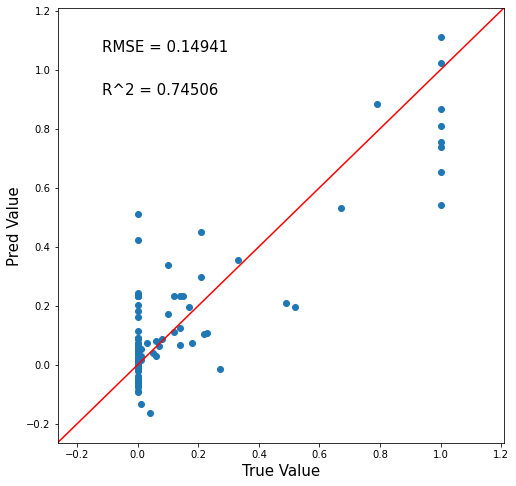

In [68]:
True_Pred_map(pred_df)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

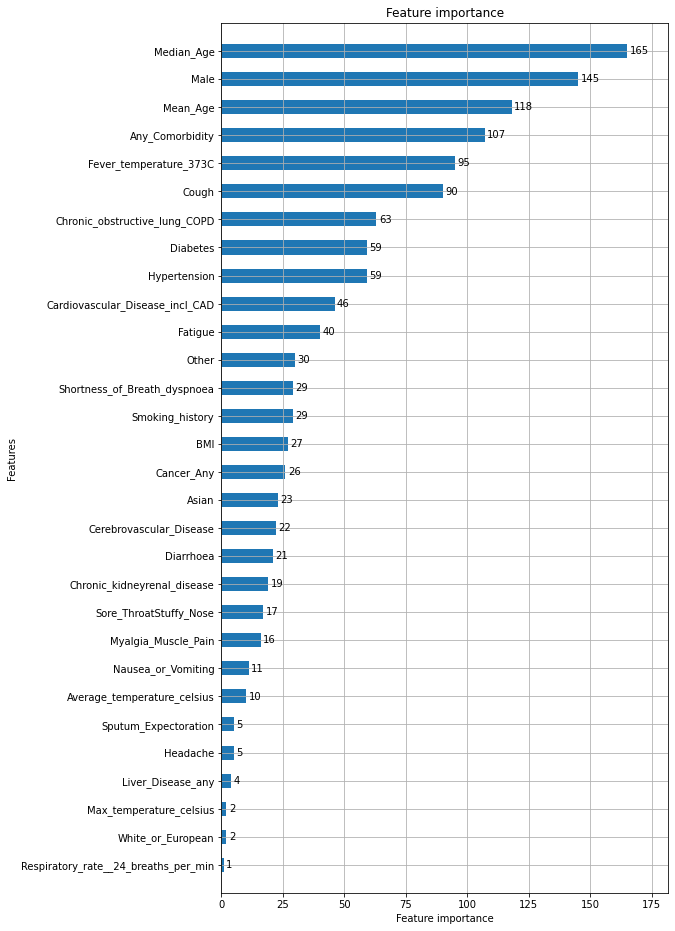

In [69]:
lgb.plot_importance(gbm, height=0.5, figsize=(8,16))